# Analisis de series de tiempo.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [218]:
df = pd.read_csv("datasets/Telefonia_movil.csv")

In [219]:
df.head()

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
0,2013,1,8.785.943,6582117,15368060,Ene-Mar 2013
1,2013,2,9.512.689,7108640,16621329,Abr-Jun 2013
2,2013,3,10.315.484,7335154,17650638,Jul-Sept 2013
3,2013,4,9.809.515,6250549,16060064,Oct-Dic 2013
4,2014,1,10.128.751,5799223,15927974,Ene-Mar 2013


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
Año                                   25 non-null int64
Trimestre                             25 non-null int64
Minutos pospago salientes (miles)     25 non-null object
Minutos prepago salientes (miles)     25 non-null int64
Total de minutos salientes (miles)    25 non-null int64
Periodo                               25 non-null object
dtypes: int64(4), object(2)
memory usage: 1.2+ KB


In [221]:
df = df.drop(columns=["Periodo"])

In [222]:
df["fecha"] = pd.to_datetime(df["Año"].astype(str) + "Q" + df["Trimestre"].astype(str))

In [223]:
df = df.set_index("fecha")

In [224]:
df.index = df.index.to_period(freq = "Q")

In [225]:
df["Minutos pospago salientes (miles)"] = pd.to_numeric(df["Minutos pospago salientes (miles)"].str.replace(".", ""))

In [226]:
df.head()

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles)
fecha,,,,,
2013Q1,2013,1,8785943,6582117,15368060
2013Q2,2013,2,9512689,7108640,16621329
2013Q3,2013,3,10315484,7335154,17650638
2013Q4,2013,4,9809515,6250549,16060064
2014Q1,2014,1,10128751,5799223,15927974


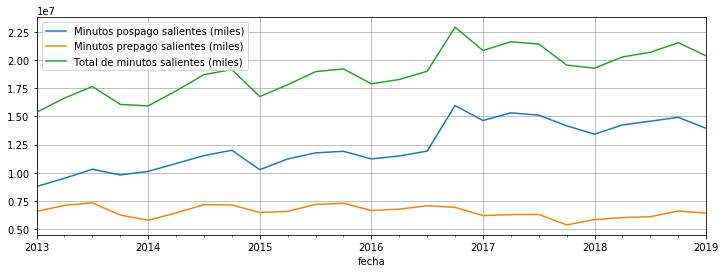

In [227]:
df.drop(columns=['Año', 'Trimestre']).plot(figsize=(12,4), grid=True)
plt.show()

**En la mayoría de los años se observa un aumento del número de minutos prepagos salientes en los 3 primeros trimestres y una disminución para el 4° trimestre; siendo esto una componente estacional presente en la serie. De manera similar, se observa este comportamiento en el número de minutos pospago salientes. Siendo este último superior y de tendencia creciente en el tiempo; mientras el otro se mantiene relativamente estable en el tiempo (componente secular) y con una dismunición en los 2 últimos años (2017 y 2018)**

In [40]:
df = df.rename(columns={
    "Minutos pospago salientes (miles)": "pospago",
    "Minutos prepago salientes (miles)": "prepago",
    "Total de minutos salientes (miles)": "total",
    "Año": "year",
    "Trimestre": "quarter"
})


In [41]:
len(df["year"].value_counts())

7

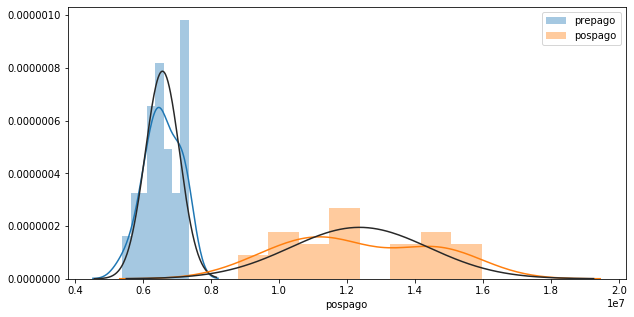

In [177]:
plt.figure(figsize=(10,5))
sns.distplot(df["prepago"], bins=8, label='prepago', fit=norm)
sns.distplot(df["pospago"], bins=8, label='pospago', fit=norm)
plt.legend()
plt.show()

**En este gráfico se puede intuir que existe 2 tipos de comportamiento con distintos valores de consumo en las cuentas pospago, que corresponde a los primeros 3 años y a los siguientes 3 años (mayor consumo). Ninguna de los consumo de las cuentas sigue una distribución normal.**

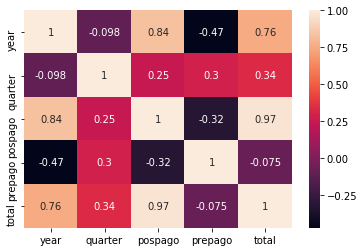

In [119]:
sns.heatmap(df.corr(), annot=True)

**Se observa una relación lineal positiva y fuerte entre el número de minutos pospago y los años (corrobora lo observado arriba, en la serie de tiempo), mientras que entre el número de minutos pospago y los años se presenta una realción lineal negativa moderada (que también corrobora lo concluido en el gráfico de la serie temporal). Las relaciones lineales entre los minutos prepago y pospago son positivas y bajas respecto a los trimestres (explicada por la presencia de estacionalidad)**

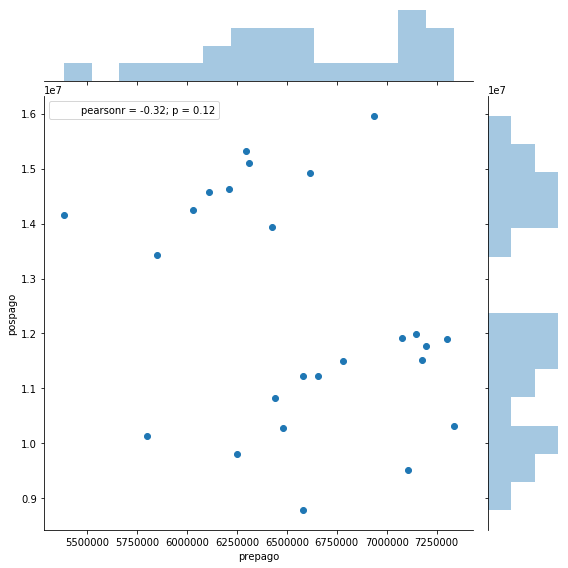

In [175]:
from scipy.stats import pearsonr, norm
sns.jointplot(x="prepago", y="pospago", data=df, marginal_kws=dict(bins=14), stat_func=pearsonr, height=8)
plt.show()

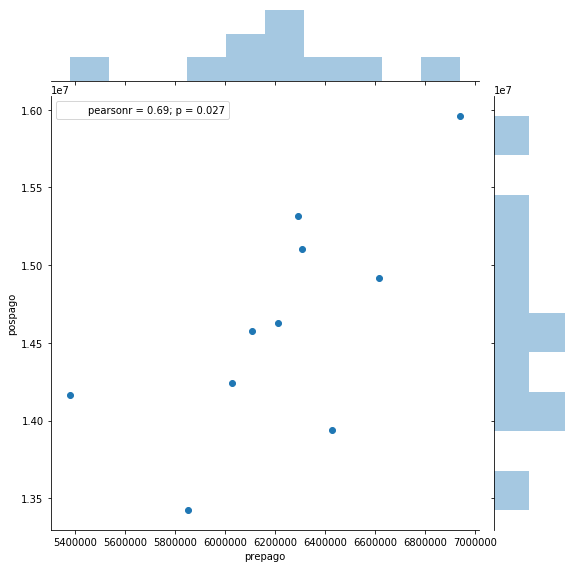

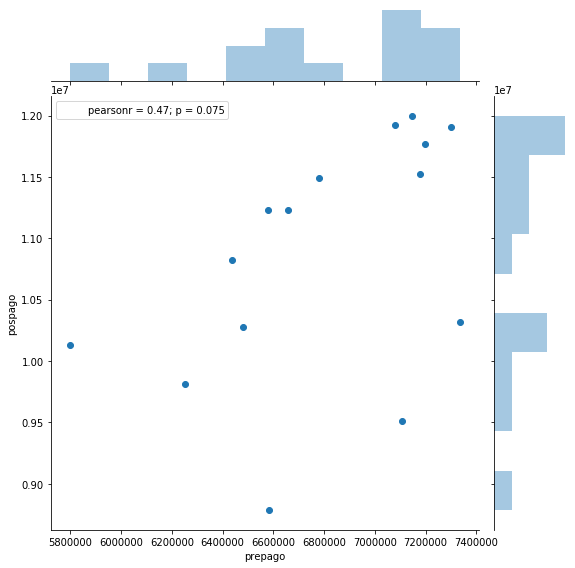

In [185]:
df_new = df.loc[df['pospago'] > 1.3e7]
df_new2 = df.loc[df['pospago'] <= 1.3e7]
sns.jointplot(x="prepago", y="pospago", data=df_new, marginal_kws=dict(bins=10), stat_func=pearsonr, height=8)
sns.jointplot(x="prepago", y="pospago", data=df_new2, marginal_kws=dict(bins=10), stat_func=pearsonr, height=8)
plt.show()

**Se puede observar una relación directa moderada entre el aumento del consumo de minutos de una cuenta prepago respecto de una pospago. Quiere decir, que generalmente cuando aumentó el consumo de minutos prepago también aumentó el consumo de minutos pospago.**

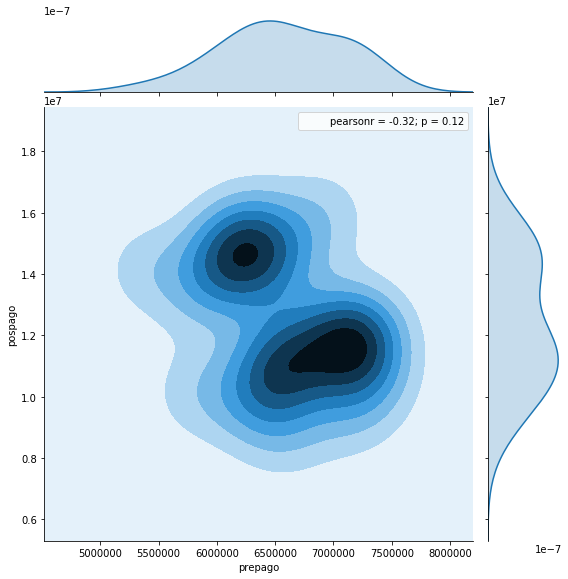

In [152]:
sns.jointplot(x="prepago", y="pospago", data=df, kind='kde', stat_func=pearsonr, height=8)
plt.show()

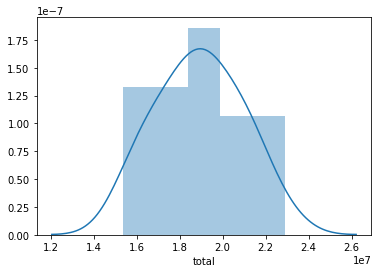

In [198]:
sns.distplot(df["total"])

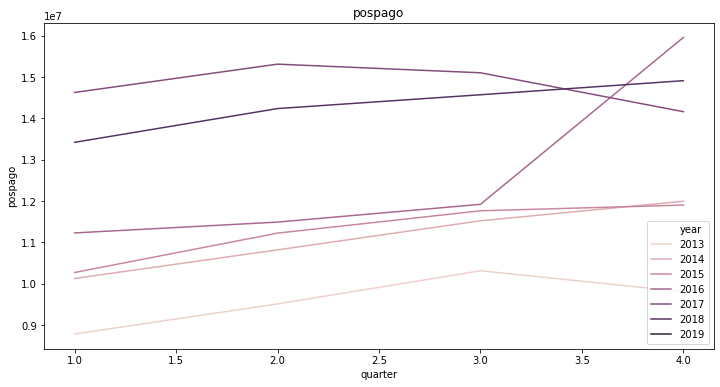

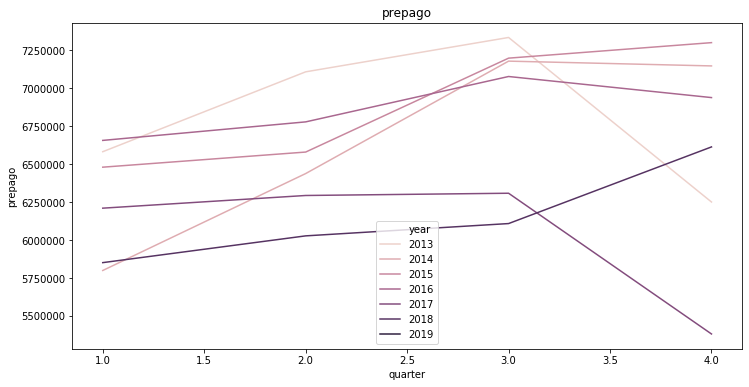

In [191]:
for i in df.drop(columns=["quarter", "year", 'total']).columns:
    plt.figure(figsize=(12, 6))
    plt.title(i)
    sns.lineplot("quarter", i, hue="year", data=df, markers='None', legend="full")
    plt.show()

**Generalmente se experimentó aumento del consumo de minutos de las cuentas pospago en los 4° trimestres, a excpeción de los años 2013 y 2018. Y en las cuentas de prepago se obtuvo una disminución en el consumo en los 4° trimestres, a excepción de los años 2015 y 2019.**

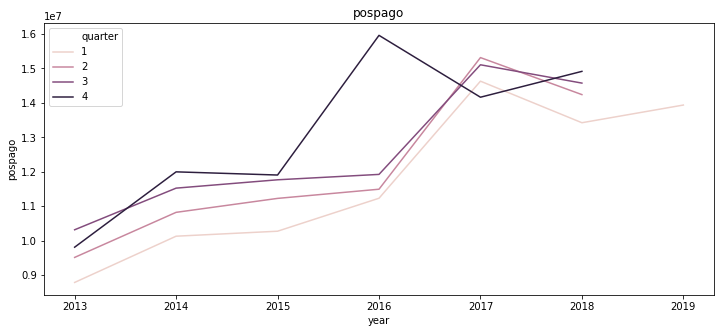

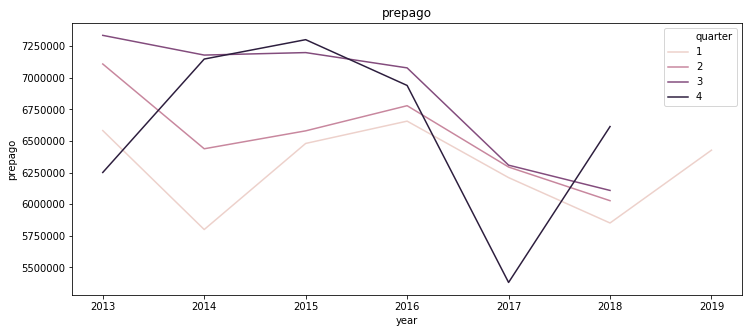

In [196]:
for i in df.drop(columns=["quarter", "year", 'total']).columns:
    plt.figure(figsize=(12, 5))
    plt.title(i)
    sns.lineplot("year", i, hue="quarter", data=df, markers='None', legend="full")
    plt.show()

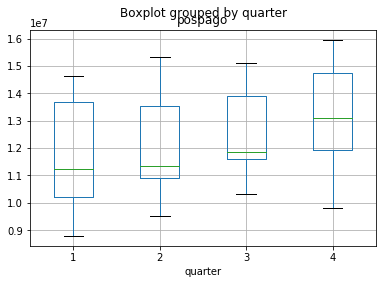

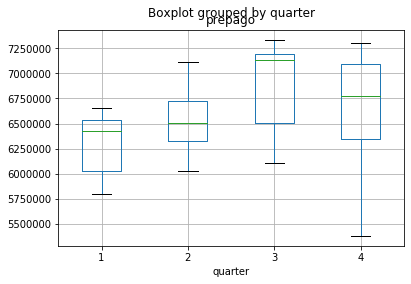

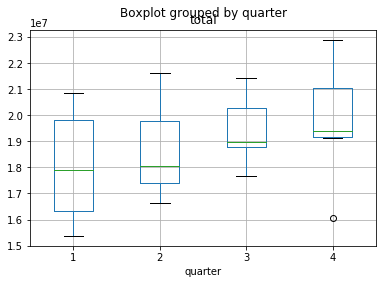

In [18]:
for i in df.drop(columns=["quarter", "year"]).columns:
    
    df.boxplot(column=i, by='quarter');


1


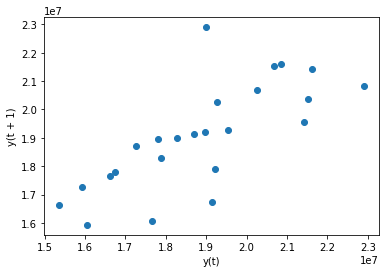

2


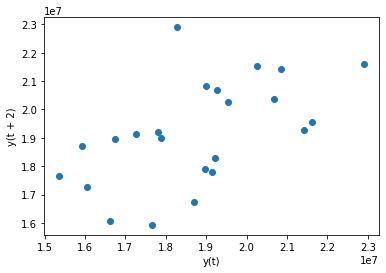

3


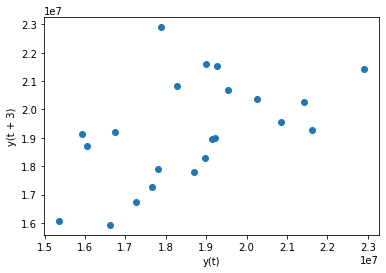

4


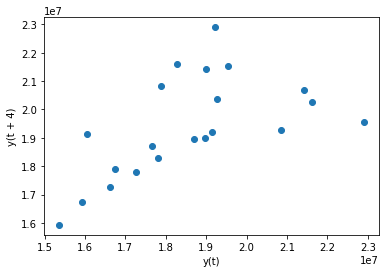

5


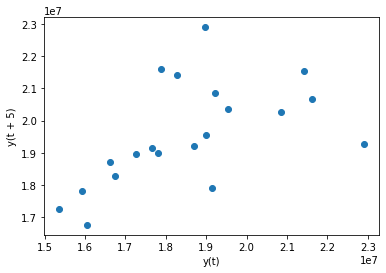

6


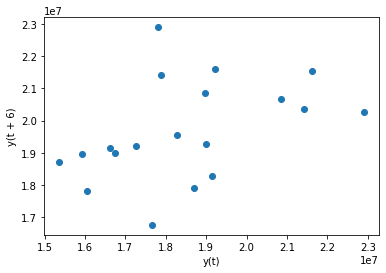

7


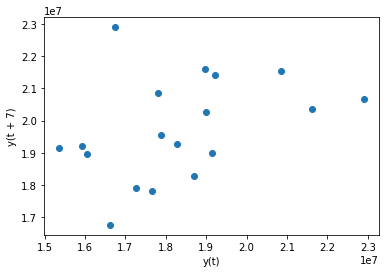

8


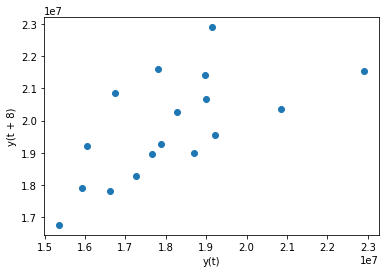

9


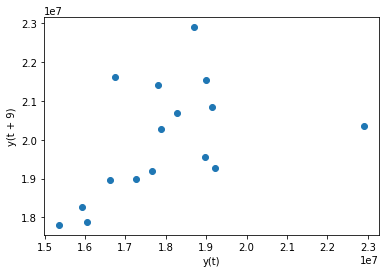

10


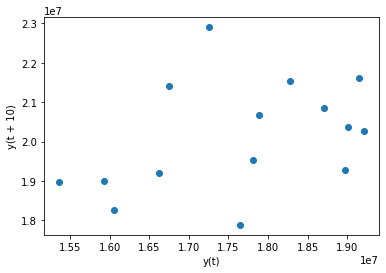

11


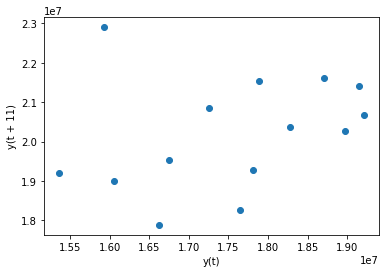

12


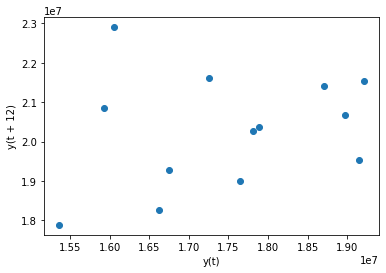

13


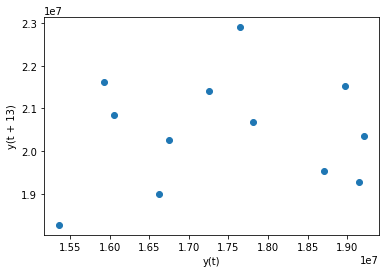

14


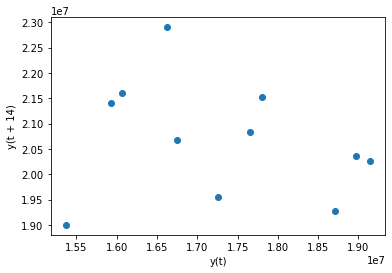

15


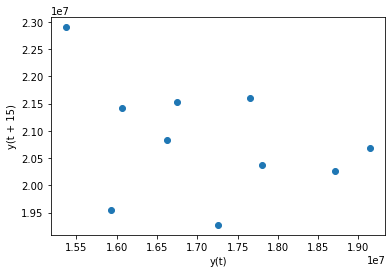

16


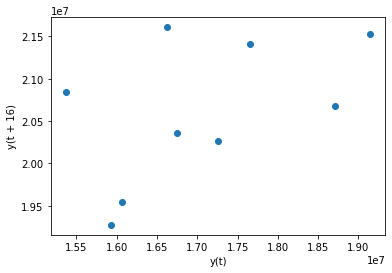

17


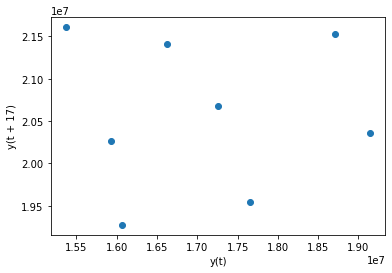

18


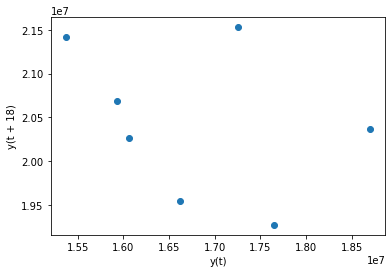

19


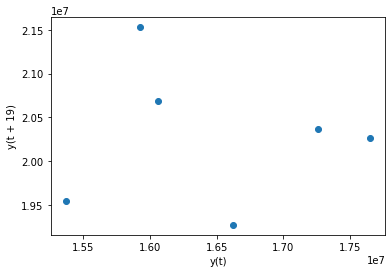

20


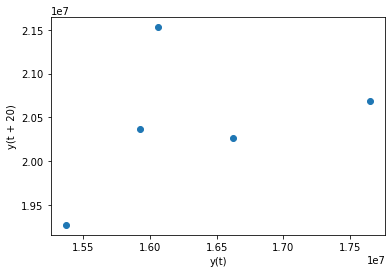

21


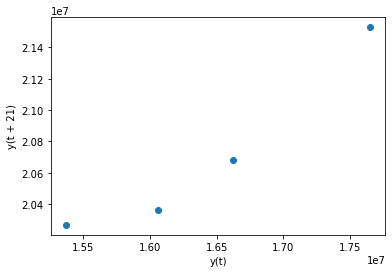

22


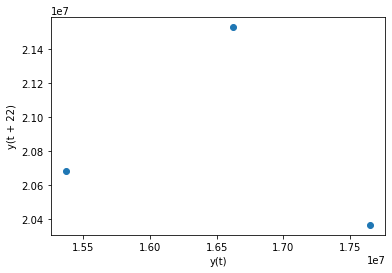

23


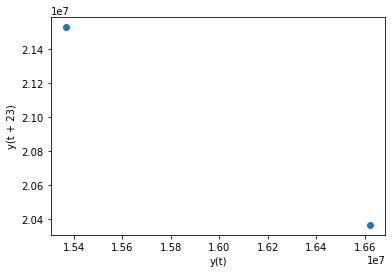

24


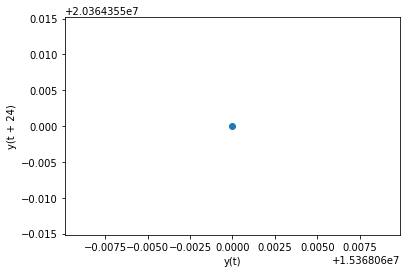

25


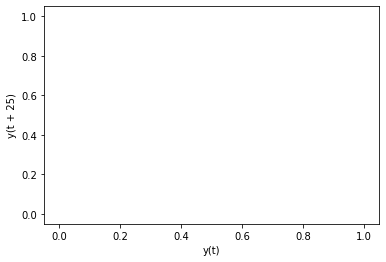

26


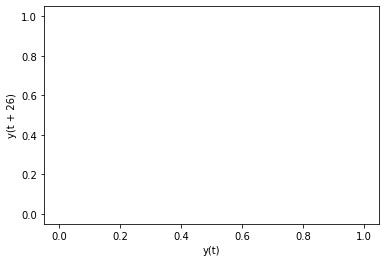

27


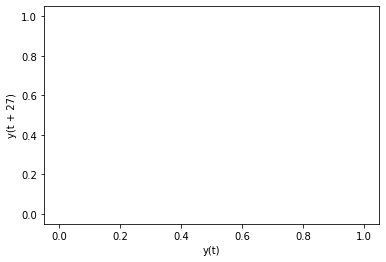

28


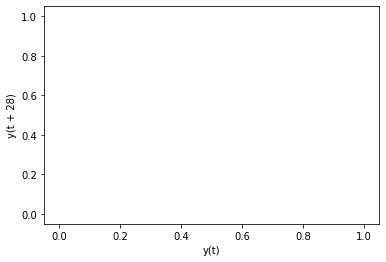

29


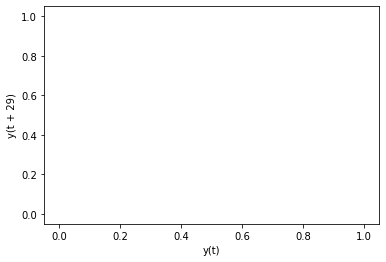

In [21]:
for i in range(1,30):
    print(i)
    pd.plotting.lag_plot(df["total"], lag=i)
    plt.show()

### Random Walk (Naïve)

In [155]:
h = 4
y = df["prepago"]
test=pd.period_range(start=y.index[-1]+1, periods=h, freq='Q')
pred=pd.Series(np.repeat(y.iloc[-1], h), index=test) # the forecast repeats the last observed values h times
pred

2019Q2    6427084
2019Q3    6427084
2019Q4    6427084
2020Q1    6427084
Freq: Q-DEC, dtype: int64

In [156]:
resid=y-y.shift(1) # the shift lags the series by one period
sigma = resid.std()
round(sigma,3)

510832.977

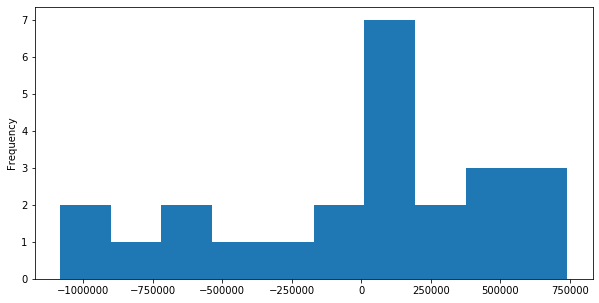

In [162]:
resid.plot.hist(bins=10, figsize=(10, 5));

In [25]:
np.arange(1,h+1)

array([1, 2, 3, 4])

In [28]:
intv = pd.concat([pred-stats.norm.ppf(0.975)*sigma*np.sqrt(np.arange(1,h+1)),
                   pred+stats.norm.ppf(0.975)*sigma*np.sqrt(np.arange(1,h+1))], axis=1)
intv.round(3)

,0,1
2019Q2,5425869.763,7428298.237
2019Q3,5011153.247,7843014.753
2019Q4,4692930.072,8161237.928
2020Q1,4424655.526,8429512.474


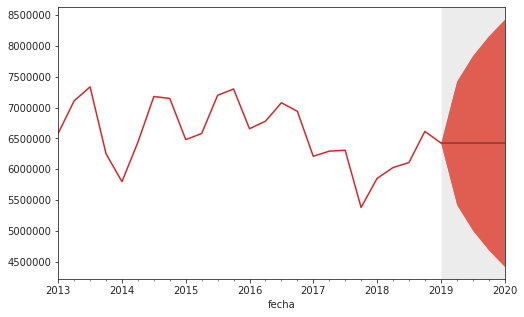

In [29]:
from plotting import fanchart

point_pred = (intv[0]+intv[1])/2

fig, ax = fanchart(y['1980':],point_pred,intv,intv,intv)

plt.show()

### Exponential Smoothing

In [31]:
model_ses = sm.tsa.SimpleExpSmoothing(y).fit()
fitted_ses = model_ses.fittedvalues
model_ses.summary()

Dep. Variable:,endog,No. Observations:,25
Model:,SimpleExpSmoothing,SSE,5830154997664.624
Optimized:,True,AIC,658.380
Trend:,None,BIC,660.817
Seasonal:,None,AICC,660.380
Seasonal Periods:,None,Date:,"Mon, 30 Sep 2019"
Box-Cox:,False,Time:,22:34:14
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4343574,alpha,True
initial_level,6.7577e+06,l.0,True


In [32]:
mse_ses = sm.tools.eval_measures.mse(y,fitted_ses)
print(' In-sample fit:')
print(' MSE               {0:.3f}'.format(mse_ses))

 In-sample fit:
 MSE               233206199906.585


In [33]:
N = len(y)
loglik_ses=-(N/2)*(1+np.log(2*np.pi))-(N/2)*np.log(mse_ses)
aic_ses=-2*loglik_ses+2*3
bic_ses=-2*loglik_ses+np.log(N)*3
print(' Log-likelihood    %.3f' % (loglik_ses))
print(' AIC               {0:.3f}'.format(aic_ses))
print(' BIC               {0:.3f}'.format(bic_ses))

 Log-likelihood    -362.663
 AIC               731.327
 BIC               734.983


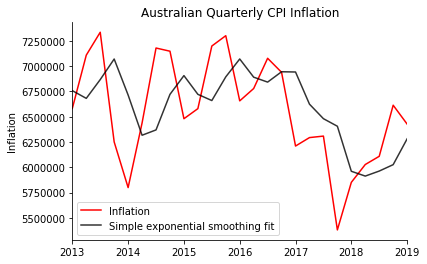

In [35]:
fig, ax= plt.subplots();#figsize=(9,6))
y.plot(color="red", label='Inflation')
fitted_ses.plot(color='black', label='Simple exponential smoothing fit', alpha=0.8)
ax.set_xlabel('')
ax.set_ylabel('Inflation')
ax.set_title('Australian Quarterly CPI Inflation')
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()